# Sales Forecasting and Optimization

This project aims to predict future sales for a retail or e-commerce 
business by using historical sales data.

Data set: Time-series retail dataset, contains daily records for multiple products across different store for Corporacion Favorita supermarket chain.

This notebook aims to make exploratory data analysis (EDA) to :
o Understand trends, seasonality, and missing values in the dataset. 
o Generate summary statistics, check for outliers, and identify key patterns and correlations.

In [100]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [101]:
# read csv file, parse the date column as datetime
dataset = pd.read_csv("train_sample.csv", parse_dates=['date'])
dataset.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,day,month,dayofweek,family,city,state,type
0,0,2013-01-01,21,3,7.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B
1,1,2013-01-01,21,4,1.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B
2,2,2013-01-01,21,5,2.0,0,1,1,1,CLEANING,Santo Domingo,Santo Domingo de los Tsachilas,B
3,3,2013-01-01,21,12,1.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B
4,4,2013-01-01,21,15,1.0,0,1,1,1,BREAD/BAKERY,Santo Domingo,Santo Domingo de los Tsachilas,B


In [102]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 13 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   item_nbr     int64         
 4   unit_sales   float64       
 5   onpromotion  int64         
 6   day          int64         
 7   month        int64         
 8   dayofweek    int64         
 9   family       object        
 10  city         object        
 11  state        object        
 12  type         object        
dtypes: datetime64[ns](1), float64(1), int64(7), object(4)
memory usage: 198.4+ MB


In [103]:
dataset.describe()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,day,month,dayofweek
count,2.000000e+06,2000000,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
mean,9.999995e+05,2013-01-26 02:37:45.033600512,2.332825e+01,7.672631e+02,8.551026e+00,5.483465e-01,1.389499e+01,1.394018e+00,3.046715e+00
min,0.000000e+00,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,-2.070000e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,4.999998e+05,2013-01-14 00:00:00,1.000000e+01,3.660000e+02,2.000000e+00,0.000000e+00,7.000000e+00,1.000000e+00,1.000000e+00
50%,9.999995e+05,2013-01-26 00:00:00,2.300000e+01,7.420000e+02,4.000000e+00,1.000000e+00,1.300000e+01,1.000000e+00,3.000000e+00
75%,1.499999e+06,2013-02-07 00:00:00,3.600000e+01,1.165000e+03,9.000000e+00,1.000000e+00,1.900000e+01,2.000000e+00,5.000000e+00
max,1.999999e+06,2013-02-19 00:00:00,5.400000e+01,1.624000e+03,7.001000e+03,1.000000e+00,3.100000e+01,2.000000e+00,6.000000e+00
std,5.773504e+05,NaN,1.377641e+01,4.638120e+02,1.965433e+01,4.976573e-01,8.232678e+00,4.886389e-01,2.006730e+00


# 1) Data Quality Checks

In [104]:
# check for missing values
missing_values_count = dataset.isnull().sum()
print(missing_values_count)

id             0
date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
day            0
month          0
dayofweek      0
family         0
city           0
state          0
type           0
dtype: int64


There is no missing values in the dataset

In [105]:
# check for duplicates
duplicates_count = dataset.duplicated().sum()
print(duplicates_count)

0


There is no duplicates in the dataset

# 2) Univariate Analysis

•	Sales Distribution - Raw Distribution

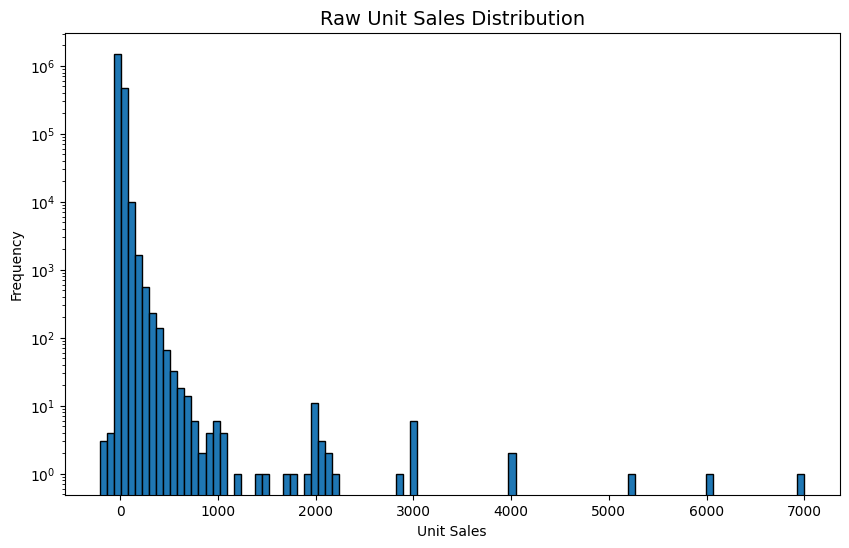

Raw Unit Sales Summary:
count    2.000000e+06
mean     8.551026e+00
std      1.965433e+01
min     -2.070000e+02
25%      2.000000e+00
50%      4.000000e+00
75%      9.000000e+00
max      7.001000e+03
Name: unit_sales, dtype: float64


In [106]:
# Plot raw unit_sales distribution to inspect skewness and spread
plt.figure(figsize=(10,6))
plt.hist(dataset['unit_sales'], bins=100, edgecolor='black')
plt.title("Raw Unit Sales Distribution", fontsize=14)
plt.xlabel("Unit Sales")
plt.ylabel("Frequency")
plt.yscale("log")  # use log scale to better visualize skewness and long tail
plt.show()

# Summary statistics
print("Raw Unit Sales Summary:")
print(dataset['unit_sales'].describe())


•	Sales Distribution - Log Transformation

d:\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


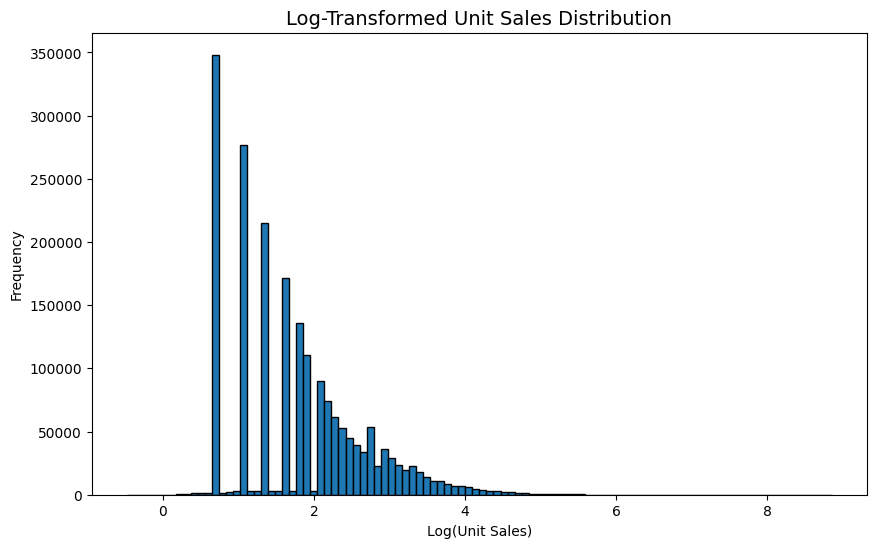

Log-Transformed Unit Sales Summary:
count    1.999873e+06
mean     1.783562e+00
std      8.704122e-01
min     -4.732088e-01
25%      1.098612e+00
50%      1.609438e+00
75%      2.302585e+00
max      8.853951e+00
Name: unit_sales_log, dtype: float64


In [107]:
# Feature engineering: log transform to reduce skewness
dataset['unit_sales_log'] = np.log1p(dataset['unit_sales'])  # log10() = log(1+x) to handle 0 values

# Check for finite values (log transform can fail with negatives)
finite_unit_sales_log = dataset['unit_sales_log'][np.isfinite(dataset['unit_sales_log'])]

# Plot log-transformed distribution
plt.figure(figsize=(10,6))
plt.hist(finite_unit_sales_log, bins=100, edgecolor='black')
plt.title("Log-Transformed Unit Sales Distribution", fontsize=14)
plt.xlabel("Log(Unit Sales)")
plt.ylabel("Frequency")
plt.show()

# Summary statistics
print("Log-Transformed Unit Sales Summary:")
print(finite_unit_sales_log.describe())


* Raw sales are highly skewed, with many small values and few very large ones.

* Log transformation stabilizes variance and reduces skewness, making the data more suitable for modeling.

•	Outlier Detection (Unit Sales)

Number of Outliers: 187876
Max Unit Sales: 7001.0


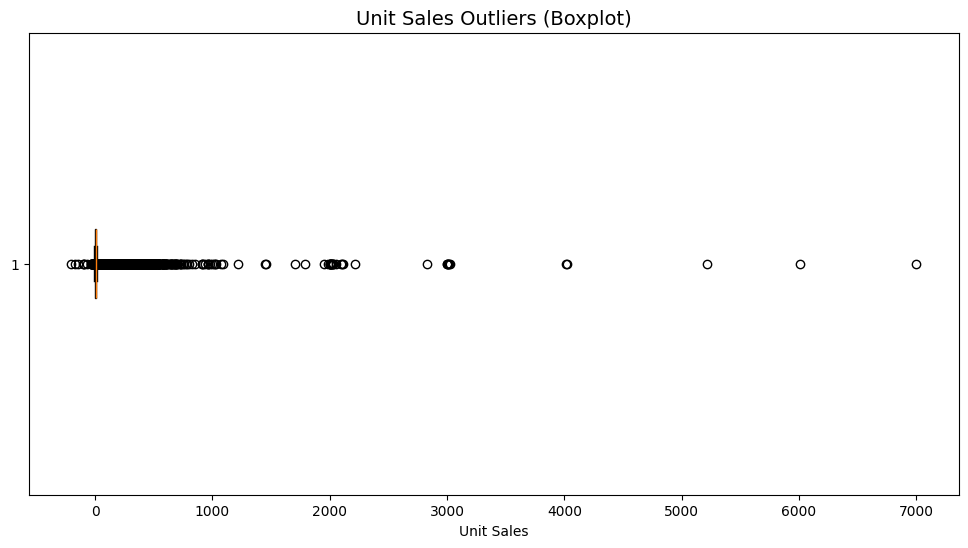

In [108]:
# 1. Calculate IQR
Q1 = dataset['unit_sales'].quantile(0.25)
Q3 = dataset['unit_sales'].quantile(0.75)
IQR = Q3 - Q1

# 2. Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Filter outliers
outliers = dataset[(dataset['unit_sales'] < lower_bound) | (dataset['unit_sales'] > upper_bound)]

print("Number of Outliers:", outliers.shape[0])
print("Max Unit Sales:", dataset['unit_sales'].max())

# 4. Visualize outliers using a boxplot
plt.figure(figsize=(12,6))
plt.boxplot(dataset['unit_sales'], vert=False, patch_artist=True)
plt.title("Unit Sales Outliers (Boxplot)", fontsize=14)
plt.xlabel("Unit Sales")
plt.show()

Business Note: Outliers or extreme unit_sales values Should not be automatically removed; likely real events, they may indicates promotional/holiday effects.

* Promotion vs Return/refund rate

Promotional items have a higher return rate, highlighting possible quality concerns or impulse-buying effects. "سلوك شراء متهور."

•	Onpromotion distribution: proportion of promoted vs. non-promoted items.

In [112]:
# get the count for promoted and non-promoted sales
promotion_counts = dataset['onpromotion'].value_counts()
promotion_counts

onpromotion
1    1096693
0     903307
Name: count, dtype: int64

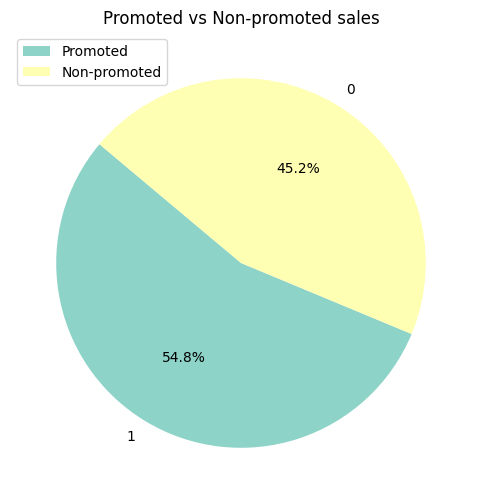

In [113]:
plt.figure(figsize=(12, 6))
plt.pie(promotion_counts.values, labels=promotion_counts.index, autopct='%1.1f%%', startangle=140,colors=plt.cm.Set3.colors)
plt.title("Promoted vs Non-promoted sales")
plt.legend(['Promoted', 'Non-promoted'], loc='upper left')
plt.show()

number of sales made during promotions are greater than those without promotions

•	Product family sales share: bar chart of Product categories

In [114]:
# get the count for each product category
family_categories = dataset['family']
family_counts = family_categories.value_counts()
family_counts

family
GROCERY I                     650658
BEVERAGES                     298981
CLEANING                      217606
PRODUCE                       149298
DAIRY                         118047
PERSONAL CARE                  74639
BREAD/BAKERY                   65385
HOME CARE                      52687
DELI                           44403
MEATS                          40991
HOME AND KITCHEN I             37551
LIQUOR,WINE,BEER               35595
FROZEN FOODS                   26831
POULTRY                        26348
HOME AND KITCHEN II            21958
EGGS                           20007
CELEBRATION                    15126
PREPARED FOODS                 12678
LAWN AND GARDEN                12670
LADIESWEAR                     10248
LINGERIE                        9760
AUTOMOTIVE                      9755
BEAUTY                          9264
PLAYERS AND ELECTRONICS         8292
SCHOOL AND OFFICE SUPPLIES      7317
PET SUPPLIES                    6832
GROCERY II                     

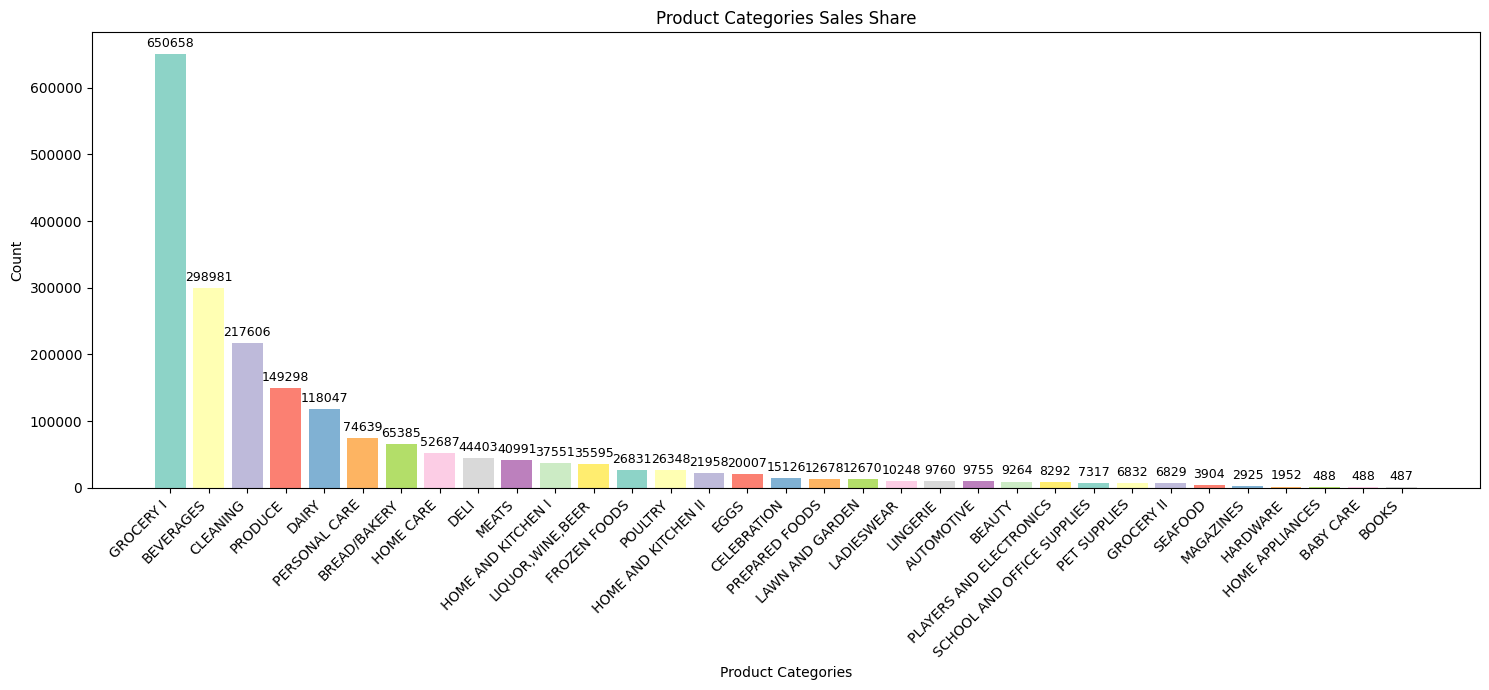

In [115]:
plt.figure(figsize=(15, 7))
bars = plt.bar(family_counts.index, family_counts.values, color=plt.cm.Set3.colors)
plt.bar_label(bars, fontsize=9, padding=3)
plt.title("Product Categories Sales Share")
plt.xlabel("Product Categories")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# 3) Returns/Refunds Analysis

•	Returns/Refunds Analysis (Negative Sales)

Number of Returns/Refunds: 130
Minimum Unit Sales Value: -207.0

Sample of Returns/Refunds:
          id       date  store_nbr  item_nbr  unit_sales  onpromotion  day  \
10655  10655 2013-01-02          9       507        -3.0            1    2   
46867  46867 2013-01-03          4       644        -1.0            1    3   
50970  50970 2013-01-03          8       397        -3.0            0    3   
71807  71807 2013-01-03         35       996       -19.0            0    3   
71992  71992 2013-01-03         35      1361       -27.0            1    3   

       month  dayofweek     family    city      state type  unit_sales_log  \
10655      1          2  HOME CARE   Quito  Pichincha    B             NaN   
46867      1          3      DAIRY   Quito  Pichincha    D            -inf   
50970      1          3  GROCERY I   Quito  Pichincha    D             NaN   
71807      1          3       DELI  Playas     Guayas    C             NaN   
71992      1          3   CLEANING  Playas     Gu

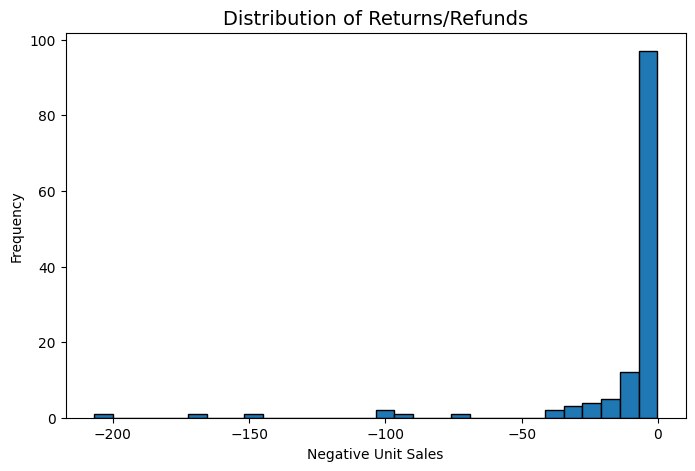

In [153]:
# Detect negative sales values (refunds/returns)
returns = dataset[dataset['unit_sales'] < 0]

print("Number of Returns/Refunds:", returns.shape[0])
print("Minimum Unit Sales Value:", dataset['unit_sales'].min())
print("\nSample of Returns/Refunds:")
print(returns.head())

# Plot histogram for returns if any exist
if not returns.empty:
    plt.figure(figsize=(8,5))
    plt.hist(returns['unit_sales'], bins=30, edgecolor='black')
    plt.title("Distribution of Returns/Refunds", fontsize=14)
    plt.xlabel("Negative Unit Sales")
    plt.ylabel("Frequency")
    plt.show()


Negative sales (returns/refunds) exist → should be treated separately during preprocessing, May be engineered into a separate feature as they have importance that may influence our predictions

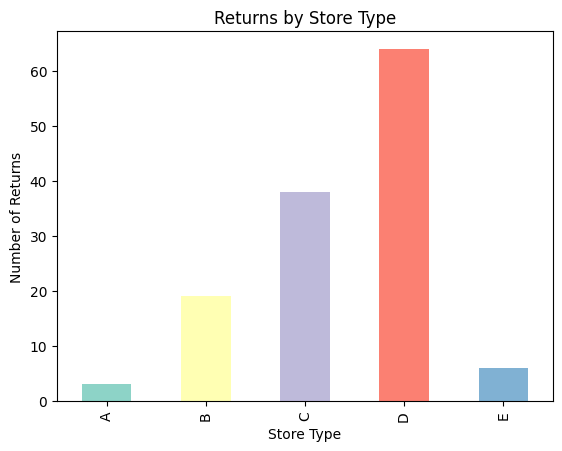

In [154]:
returns_by_type = returns.groupby('type')['unit_sales'].count()
returns_by_type.plot(kind='bar', color=plt.cm.Set3.colors)
plt.title("Returns by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Number of Returns")
plt.show()


Store-type analysis suggests that `Type [D]` stores handle significantly more returns, potentially linked to store size or policies

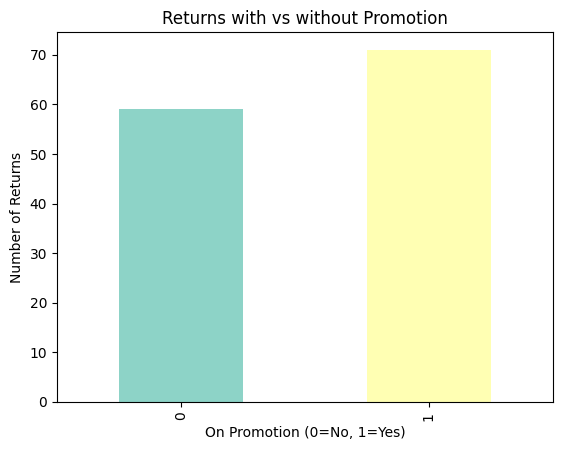

In [155]:
promo_returns = returns.groupby('onpromotion')['unit_sales'].count()
promo_returns.plot(kind='bar', color=plt.cm.Set3.colors)
plt.title("Returns with vs without Promotion")
plt.xlabel("On Promotion (0=No, 1=Yes)")
plt.ylabel("Number of Returns")
plt.show()

# 4) Time Series Exploration

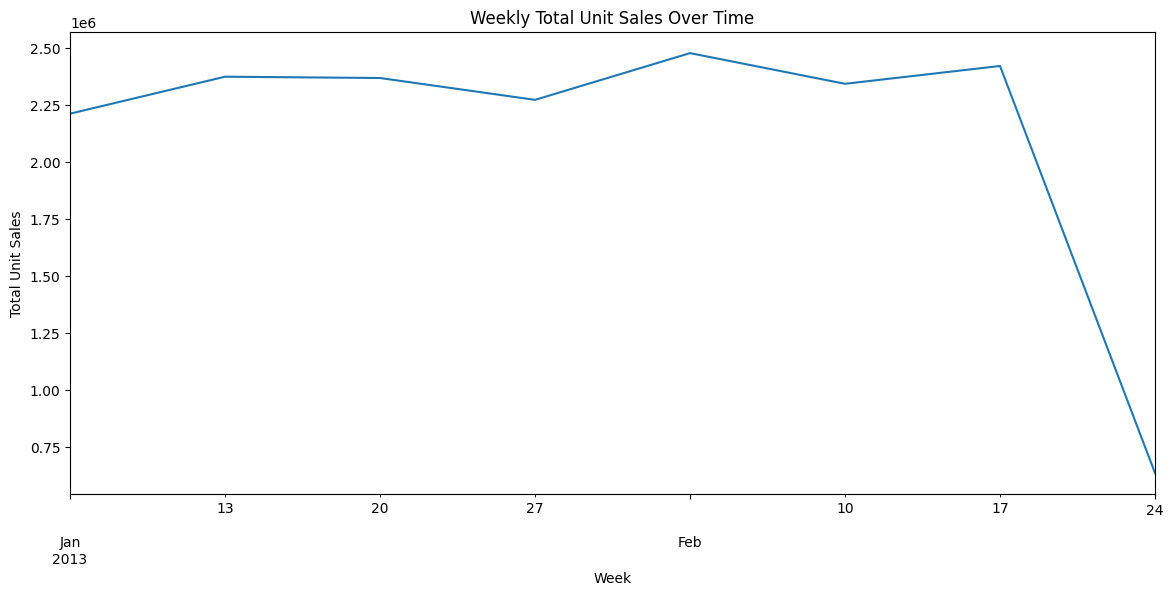

In [116]:
# Removes daily noise and shows weekly patterns.
weekly_sales = dataset.groupby(dataset['date'].dt.to_period("W"))['unit_sales'].sum()

plt.figure(figsize=(14,6))
weekly_sales.plot()
plt.title("Weekly Total Unit Sales Over Time")
plt.xlabel("Week")
plt.ylabel("Total Unit Sales")
plt.show()


- **Weekly Aggregation:**  
  Aggregating sales by week smooths out daily noise and reveals clearer weekly patterns and trends. This highlights recurring patterns such as weekend spikes.

•	Sales by Day of Week: bar chart to see avg sales across days of the week

In [117]:
# group the data by dow and compute the avg for unit_sales per dow
avg_sales_by_dow = dataset.groupby(by='dayofweek')['unit_sales'].mean()
avg_sales_by_dow

dayofweek
0     7.858437
1     7.525689
2     8.219205
3     7.240532
4     7.977523
5    10.342351
6    10.439770
Name: unit_sales, dtype: float64

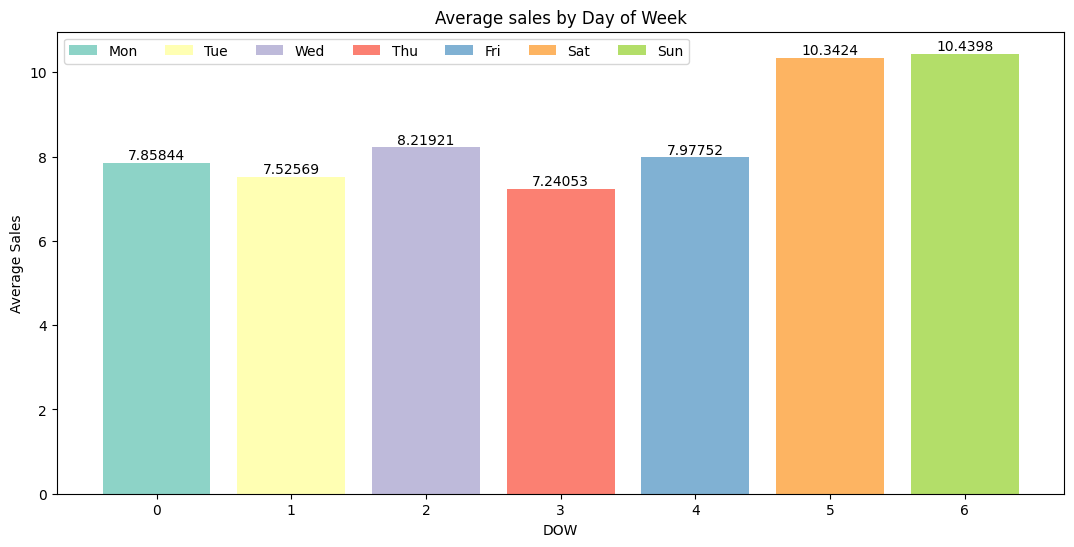

In [118]:
plt.figure(figsize=(13, 6))
bars = plt.bar(avg_sales_by_dow.index, avg_sales_by_dow.values, color=plt.cm.Set3.colors, label=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.bar_label(bars)
plt.title("Average sales by Day of Week")
plt.xlabel("DOW")
plt.ylabel("Average Sales")
plt.legend(loc='upper left', ncol=7)
plt.show()

Average sales on Saturday and Sunday are higher than the rest day sof the week.

•	Avg sales for each week of the year: line plot of weekly sales

In [119]:
# craete a week column from the date column to use it for aggregation
dataset['week'] = dataset['date'].dt.isocalendar().week
dataset.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,day,month,dayofweek,family,city,state,type,unit_sales_log,week
0,0,2013-01-01,21,3,7.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B,2.079442,1
1,1,2013-01-01,21,4,1.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B,0.693147,1
2,2,2013-01-01,21,5,2.0,0,1,1,1,CLEANING,Santo Domingo,Santo Domingo de los Tsachilas,B,1.098612,1
3,3,2013-01-01,21,12,1.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B,0.693147,1
4,4,2013-01-01,21,15,1.0,0,1,1,1,BREAD/BAKERY,Santo Domingo,Santo Domingo de los Tsachilas,B,0.693147,1


In [120]:
# group the data by the created week column and computer the avreage for unit_sale for each week of the year
avg_sales_by_week = dataset.groupby(by='week')['unit_sales'].mean()
avg_sales_by_week

week
1    10.693628
2     8.495559
3     8.341768
4     8.034102
5     8.533999
6     8.099574
7     8.436116
8     7.887950
Name: unit_sales, dtype: float64

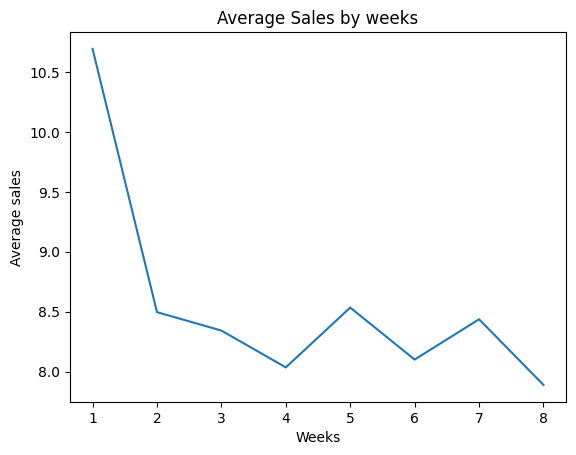

In [121]:
plt.plot(avg_sales_by_week.index, avg_sales_by_week.values)
plt.title("Average Sales by weeks")
plt.xlabel("Weeks")
plt.ylabel("Average sales")
plt.show()

Average sales was high in the first week of the year comparable to the rest 7 weeks

* Check Unusual spikes/drops in daily sales 

In [122]:
daily_sales = dataset.groupby(by='date')['unit_sales'].sum().reset_index()
daily_sales.head()

,date,unit_sales
0,2013-01-01,2511.619
1,2013-01-02,496092.418
2,2013-01-03,361429.231
3,2013-01-04,354459.677
4,2013-01-05,477350.121


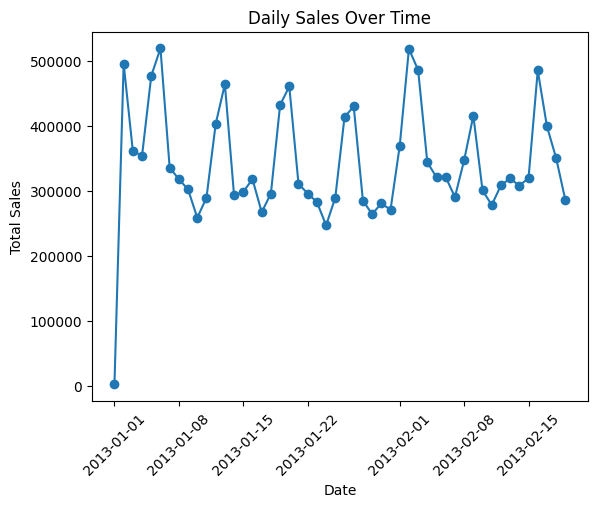

In [123]:
plt.plot(daily_sales['date'], daily_sales['unit_sales'],  marker="o", linestyle="-")
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

# 5) Promotion Impact

* Total sales with and without promotions

In [124]:
avg_sales_promotions = dataset.groupby(by='onpromotion')['unit_sales'].sum()
avg_sales_promotions

onpromotion
0    7713720.166
1    9388332.336
Name: unit_sales, dtype: float64

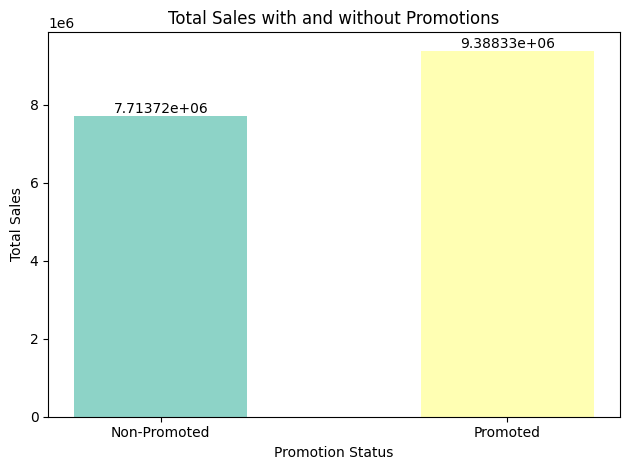

In [125]:
# plt.figure(figsize=(8, 6))
bars = plt.bar(['Non-Promoted', 'Promoted'], avg_sales_promotions.values, color=plt.cm.Set3.colors, width=0.5)
plt.bar_label(bars)
plt.title("Total Sales with and without Promotions")
plt.xlabel("Promotion Status")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

Total sales with promotions are higher than without promotions

* Total sales vs number of items on promotions per day

In [126]:
# get daily number of items on promotion
daily_items_on_promotion = dataset.groupby(by='date')['onpromotion'].sum()
daily_items_on_promotion


date
2013-01-01      397
2013-01-02    28593
2013-01-03    28400
2013-01-04    30772
2013-01-05    28177
2013-01-06    28985
2013-01-07    26193
2013-01-08    26019
2013-01-09    26617
2013-01-10    27093
2013-01-11    30171
2013-01-12    28006
2013-01-13    29169
2013-01-14    26248
2013-01-15    26467
2013-01-16    27319
2013-01-17     5215
2013-01-18    28437
2013-01-19     9115
2013-01-20    11861
2013-01-21     5068
2013-01-22     5581
2013-01-23    12196
2013-01-24     8546
2013-01-25    28674
2013-01-26    11133
2013-01-27    13522
2013-01-28     6564
2013-01-29     7487
2013-01-30    25719
2013-01-31    15354
2013-02-01    32572
2013-02-02    29908
2013-02-03    30105
2013-02-04    27539
2013-02-05    27373
2013-02-06    27990
2013-02-07    28480
2013-02-08    31886
2013-02-09    29019
2013-02-10    27527
2013-02-11    25618
2013-02-12    26464
2013-02-13    28305
2013-02-14    28451
2013-02-15    31618
2013-02-16    29182
2013-02-17     9842
2013-02-18     6054
2013-02-19     

In [127]:
# get daily total sales
daily_total_sales = dataset.groupby(by='date')['unit_sales'].sum()
daily_total_sales

date
2013-01-01      2511.619
2013-01-02    496092.418
2013-01-03    361429.231
2013-01-04    354459.677
2013-01-05    477350.121
2013-01-06    519695.401
2013-01-07    336122.801
2013-01-08    318347.778
2013-01-09    302530.809
2013-01-10    258982.003
2013-01-11    289737.685
2013-01-12    403257.212
2013-01-13    464638.548
2013-01-14    293328.362
2013-01-15    298969.550
2013-01-16    318347.914
2013-01-17    267498.516
2013-01-18    296130.850
2013-01-19    432459.852
2013-01-20    461092.386
2013-01-21    311211.266
2013-01-22    296214.729
2013-01-23    283258.453
2013-01-24    247245.691
2013-01-25    290022.772
2013-01-26    413799.768
2013-01-27    430411.991
2013-01-28    285460.170
2013-01-29    264488.818
2013-01-30    281061.127
2013-01-31    271254.218
2013-02-01    369402.055
2013-02-02    518887.463
2013-02-03    486336.820
2013-02-04    344308.715
2013-02-05    321245.839
2013-02-06    321538.177
2013-02-07    290807.531
2013-02-08    347441.790
2013-02-09    416176

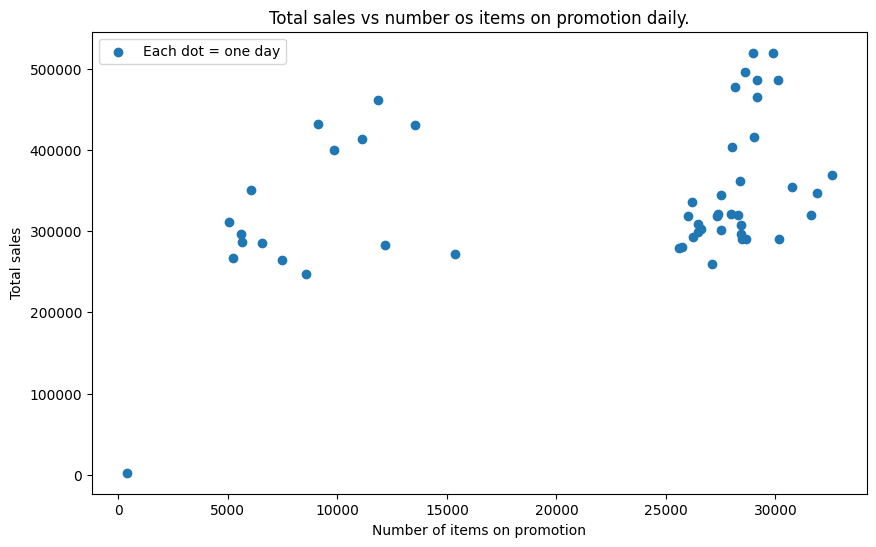

In [128]:
plt.figure(figsize=(10, 6))
plt.scatter(daily_items_on_promotion.values, daily_total_sales.values, label="Each dot = one day")
plt.title("Total sales vs number os items on promotion daily.")
plt.xlabel("Number of items on promotion")
plt.ylabel("Total sales")
plt.legend()
plt.show()

since the dots tends upwards then more promotions -> more sales

* 	Average sales on promotion vs without promotion for each product family

In [129]:
promo_family_grouped = dataset.groupby(by=['family', 'onpromotion'])['unit_sales'].mean()
promo_family_grouped = promo_family_grouped.reset_index()
promo_family_grouped.rename(columns={'unit_sales': 'avg_sales'}, inplace=True)
promo_family_grouped

,family,onpromotion,avg_sales
0,AUTOMOTIVE,0,8.842909
1,AUTOMOTIVE,1,8.766053
2,BABY CARE,0,9.160843
3,BABY CARE,1,7.749139
4,BEAUTY,0,8.671993
...,...,...,...
61,PRODUCE,1,8.601181
62,SCHOOL AND OFFICE SUPPLIES,0,8.916540
63,SCHOOL AND OFFICE SUPPLIES,1,8.334511
64,SEAFOOD,0,8.273150


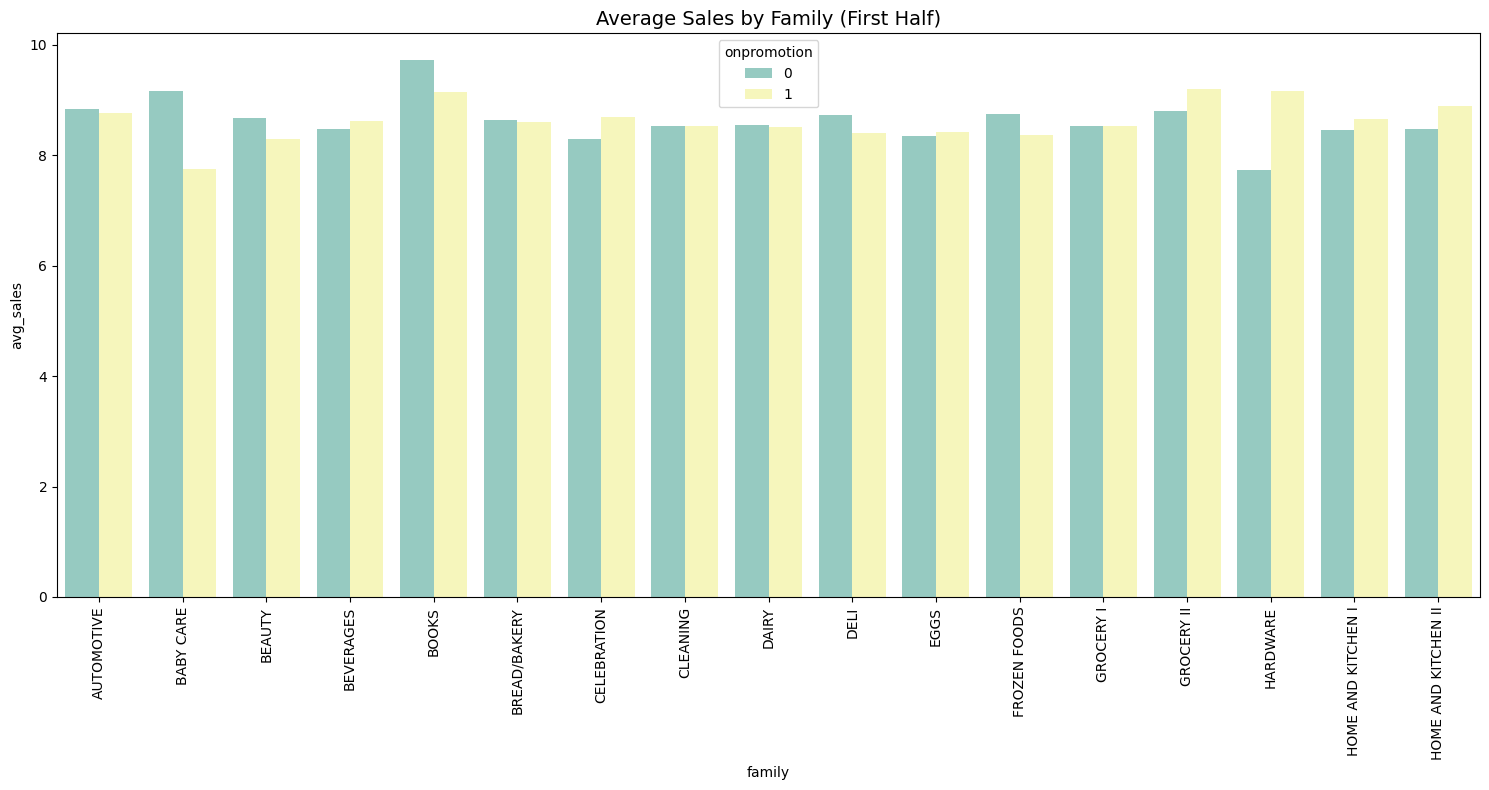

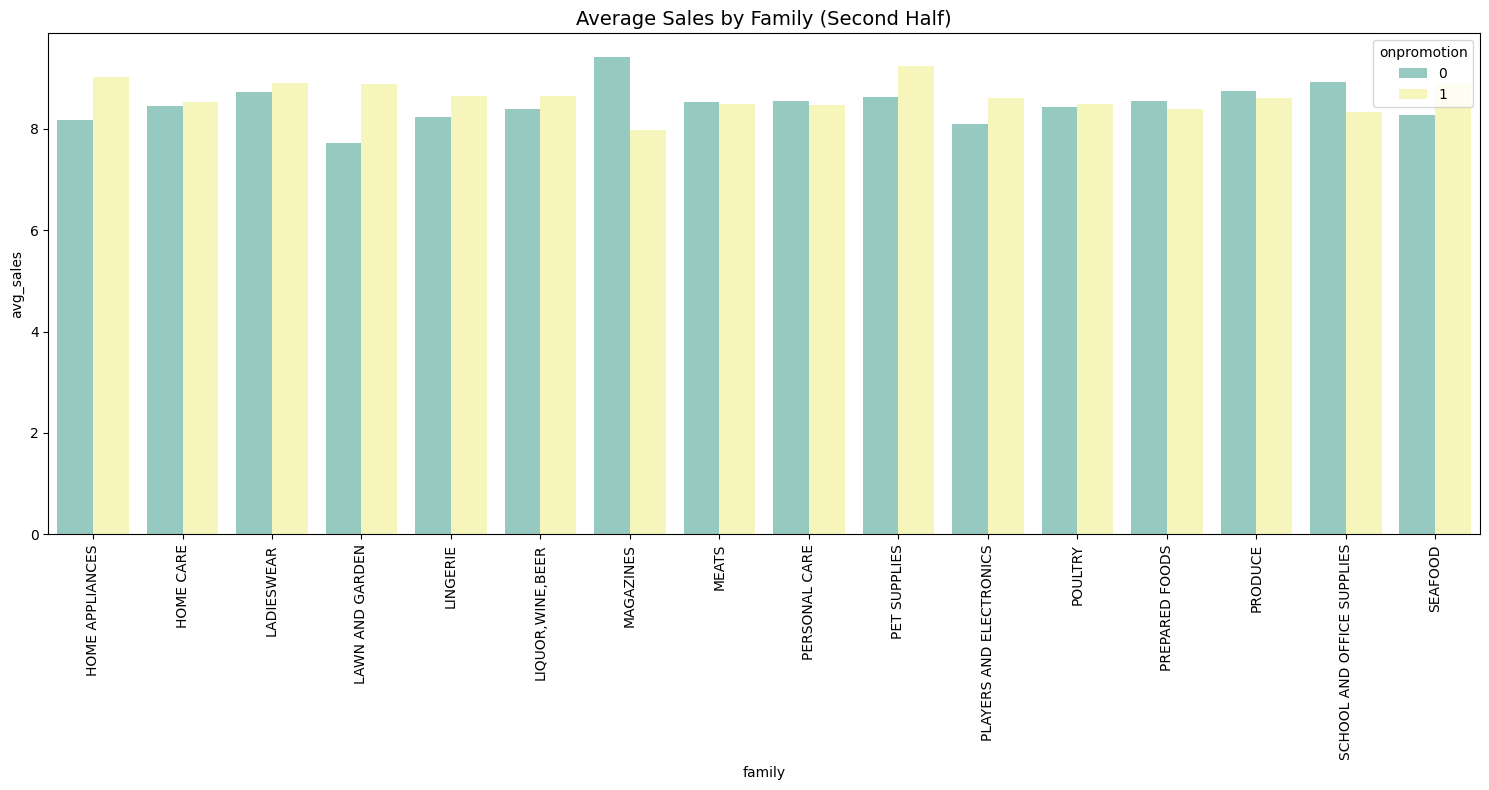

In [130]:
import math
# split families into two halves
families = promo_family_grouped['family'].unique()
half = math.ceil(len(families) / 2)
families_1 = families[:half]
families_2 = families[half:]

# first half plot
plt.figure(figsize=(15, 8))
sns.barplot(
    promo_family_grouped[promo_family_grouped['family'].isin(families_1)],
    x='family', y='avg_sales', hue='onpromotion',
    palette=plt.cm.Set3.colors
)
plt.title("Average Sales by Family (First Half)", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# second half plot
plt.figure(figsize=(15, 8))
sns.barplot(
    promo_family_grouped[promo_family_grouped['family'].isin(families_2)],
    x='family', y='avg_sales', hue='onpromotion',
    palette=plt.cm.Set3.colors
)
plt.title("Average Sales by Family (Second Half)", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


We can see the difference (increase or decrease) between the average sales per item family for promoted and non-promoted items.
Some families face increase in sales when items are on promotion and other face decraese in sales

# 6) Store & Regional Analysis

* Store Counts -> Which state stores dominate sales?

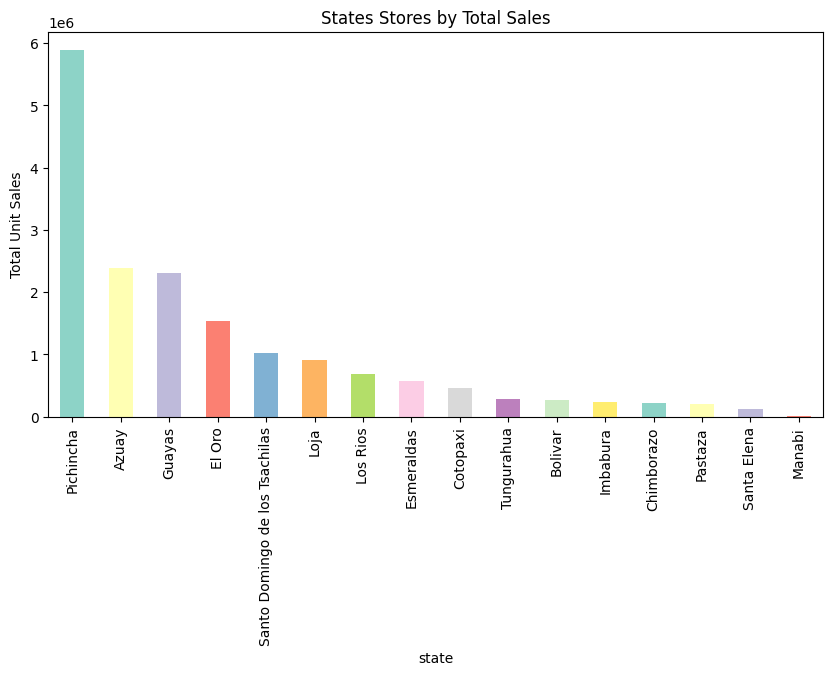

In [131]:
store_sales = dataset.groupby("state")["unit_sales"].sum().sort_values(ascending=False)
store_sales.plot(kind="bar", figsize=(10, 5), color=plt.cm.Set3.colors)
plt.title("States Stores by Total Sales")
plt.ylabel("Total Unit Sales")
plt.show()

- **Regional Analysis:** Sales are highly concentrated in a few states, especially Pichincha. state is a strong predictor of sales and should be included as a feature.

*  Store Counts -> Which store types dominate sales?

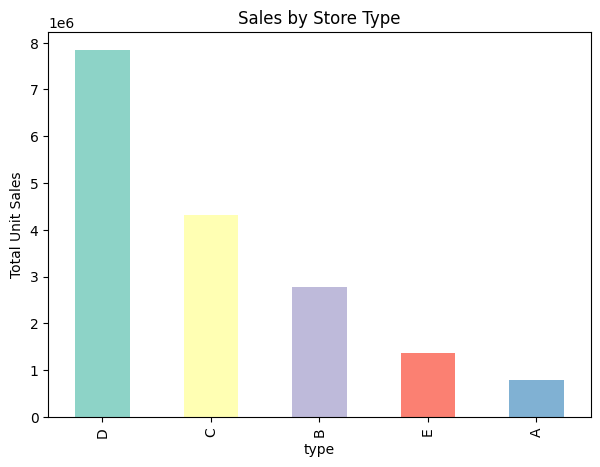

In [132]:
type_sales = dataset.groupby("type")["unit_sales"].sum().sort_values(ascending=False)
type_sales.plot(kind="bar", figsize=(7,5), color=plt.cm.Set3.colors)
plt.title("Sales by Store Type")
plt.ylabel("Total Unit Sales")
plt.show()

- **Store Type Analysis:** Store type `[D]` has the highest total sales, but this may be due to more stores or larger stores. Normalize by store count for fair comparison. Further analysis (e.g., regression) is needed to isolate the effect of store type from other factors (location, promotions).


To see if type “A” dominates because it has more stores, or because each A store sells more on average:


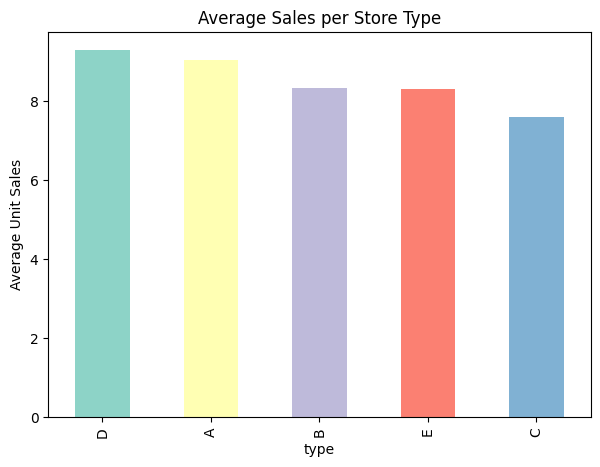

In [133]:
type_avg_sales = dataset.groupby("type")["unit_sales"].mean().sort_values(ascending=False)
type_avg_sales.plot(kind="bar", figsize=(7,5), color=plt.cm.Set3.colors)
plt.title("Average Sales per Store Type")
plt.ylabel("Average Unit Sales")
plt.show()

Avoid assuming that total sales dominance is only due to store count; average sales per store provides a more nuanced view of store type performance.


* Store–Item Interactions (Regional Bestsellers)

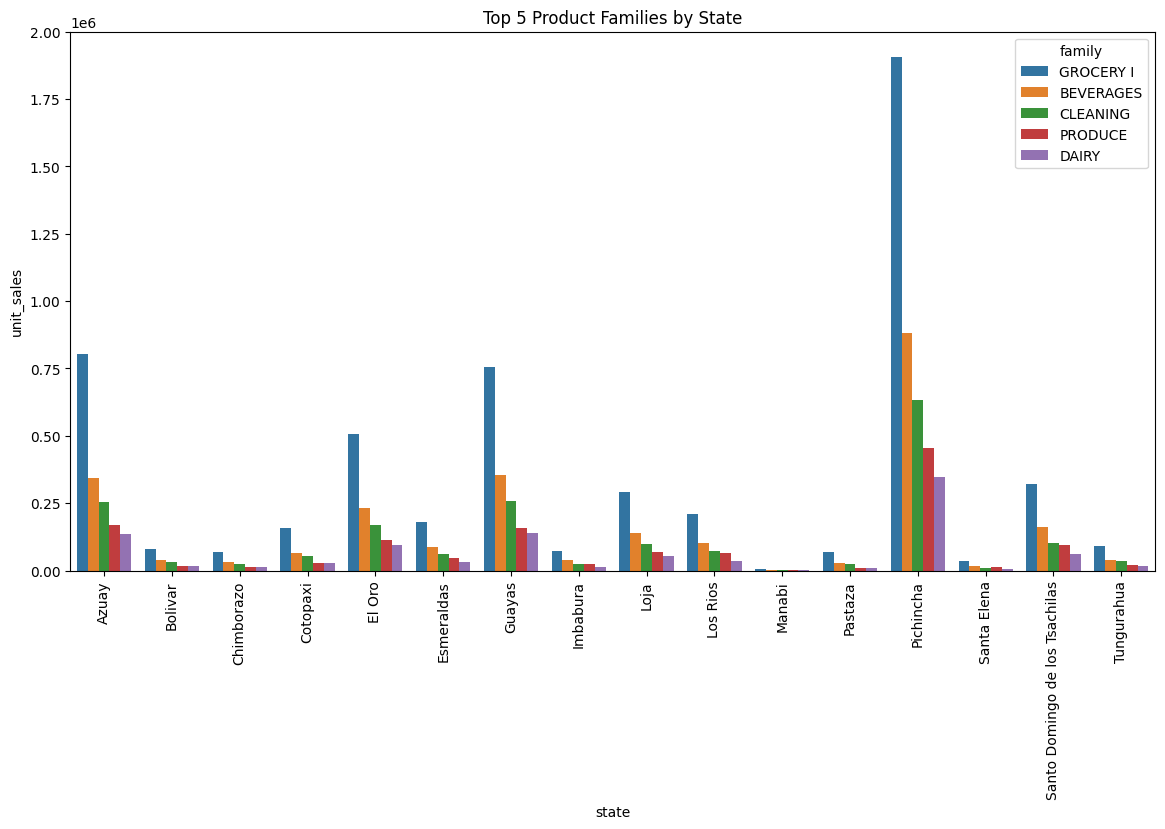

In [134]:
# Top 5 families per state
top_families_state = (
    dataset.groupby(["state", "family"])["unit_sales"].sum()
    .reset_index()
    .sort_values(["state","unit_sales"], ascending=[True, False])
)

# Select top 5 families for each state
top_families_state = top_families_state.groupby("state").head(5)

plt.figure(figsize=(14,7))
sns.barplot(data=top_families_state, x="state", y="unit_sales", hue="family")
plt.title("Top 5 Product Families by State")
plt.xticks(rotation=90)
plt.show()

**regional preferences:** For each state, find the top 5 bestselling product families.

#  7) Correlations & Relationships

* Step 1 — Create Lagged Sales Columns

In [137]:
# Aggregate daily total sales
daily_sales = dataset.groupby('date')['unit_sales'].sum()

# Create lagged sales columns
daily_sales_df = daily_sales.to_frame(name="unit_sales")
daily_sales_df['lag_7'] = daily_sales_df['unit_sales'].shift(7)
daily_sales_df['lag_14'] = daily_sales_df['unit_sales'].shift(14)
daily_sales_df['lag_30'] = daily_sales_df['unit_sales'].shift(30)

daily_sales_df.head(15)
# Note: The NaN values in the first rows of the lag_7, lag_14, and lag_30 columns are expected and correct. This happens because:
#  For the first 6 days, there is no data from 7 days ago, so the value is NaN. Similarly, lag_14 and lag_30 will be NaN for the first 13 and 29 days,

,unit_sales,lag_7,lag_14,lag_30
date,,,,
2013-01-01,2511.619,NaN,NaN,NaN
2013-01-02,496092.418,NaN,NaN,NaN
2013-01-03,361429.231,NaN,NaN,NaN
2013-01-04,354459.677,NaN,NaN,NaN
2013-01-05,477350.121,NaN,NaN,NaN
2013-01-06,519695.401,NaN,NaN,NaN
2013-01-07,336122.801,NaN,NaN,NaN
2013-01-08,318347.778,2511.619,NaN,NaN
2013-01-09,302530.809,496092.418,NaN,NaN


*  Step 2 — Calculate Correlations

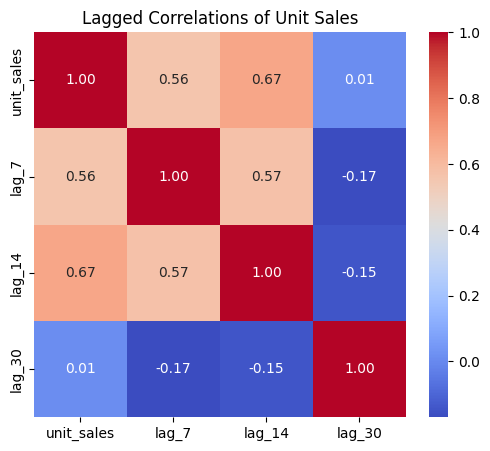

In [138]:
correlations = daily_sales_df.corr()
# Step 3 — Visualize Lagged Correlations
plt.figure(figsize=(6,5))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Lagged Correlations of Unit Sales")
plt.show()

* Step 4 — Scatter Plots to Visualize Relationships

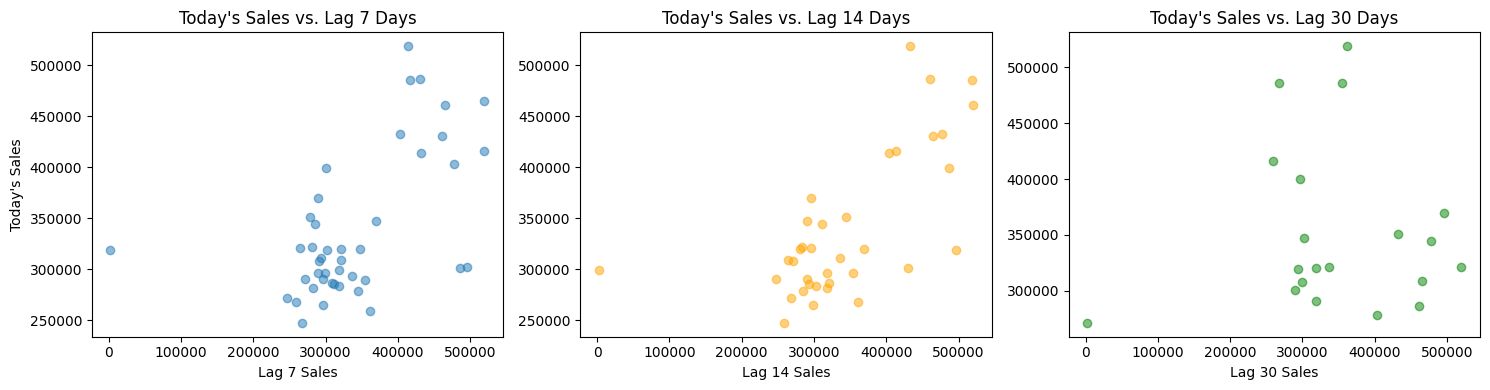

In [139]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.scatter(daily_sales_df['lag_7'], daily_sales_df['unit_sales'], alpha=0.5)
plt.title("Today's Sales vs. Lag 7 Days")
plt.xlabel("Lag 7 Sales")
plt.ylabel("Today's Sales")

plt.subplot(1,3,2)
plt.scatter(daily_sales_df['lag_14'], daily_sales_df['unit_sales'], alpha=0.5, color="orange")
plt.title("Today's Sales vs. Lag 14 Days")
plt.xlabel("Lag 14 Sales")

plt.subplot(1,3,3)
plt.scatter(daily_sales_df['lag_30'], daily_sales_df['unit_sales'], alpha=0.5, color="green")
plt.title("Today's Sales vs. Lag 30 Days")
plt.xlabel("Lag 30 Sales")

plt.tight_layout()
plt.show()

**Purpose:**  
This section explores the relationship between current sales and past sales (lagged features), which is crucial for time series forecasting.

**What was done:**  
- Created lagged features: sales from 7, 14, and 30 days ago.
- Calculated correlations between today's sales and these lagged values.
- Visualized correlations with a heatmap and scatter plots.

**Insights:**
- The correlation matrix and heatmap show that there is a **positive correlation** between current sales and sales from previous weeks (especially lag 7), indicating that past sales are predictive of future sales.
- The scatter plots confirm this relationship: higher sales in the past week(s) generally correspond to higher sales today, though there is some spread due to noise and seasonality.
- **Lagged features** (such as sales from 7, 14, and 30 days ago) are valuable predictors and should be included in forecasting models.


# 8) Feature Engineering Checks (during EDA)

In [142]:
dataset.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,day,month,dayofweek,family,city,state,type,unit_sales_log,week,family_encoded,city_encoded,state_encoded,type_encoded
0,0,2013-01-01,21,3,7.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B,2.079442,1,12,21,14,1
1,1,2013-01-01,21,4,1.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B,0.693147,1,12,21,14,1
2,2,2013-01-01,21,5,2.0,0,1,1,1,CLEANING,Santo Domingo,Santo Domingo de los Tsachilas,B,1.098612,1,7,21,14,1
3,3,2013-01-01,21,12,1.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B,0.693147,1,12,21,14,1
4,4,2013-01-01,21,15,1.0,0,1,1,1,BREAD/BAKERY,Santo Domingo,Santo Domingo de los Tsachilas,B,0.693147,1,5,21,14,1


* verify unit_sales is scaled into units_sales_log

d:\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


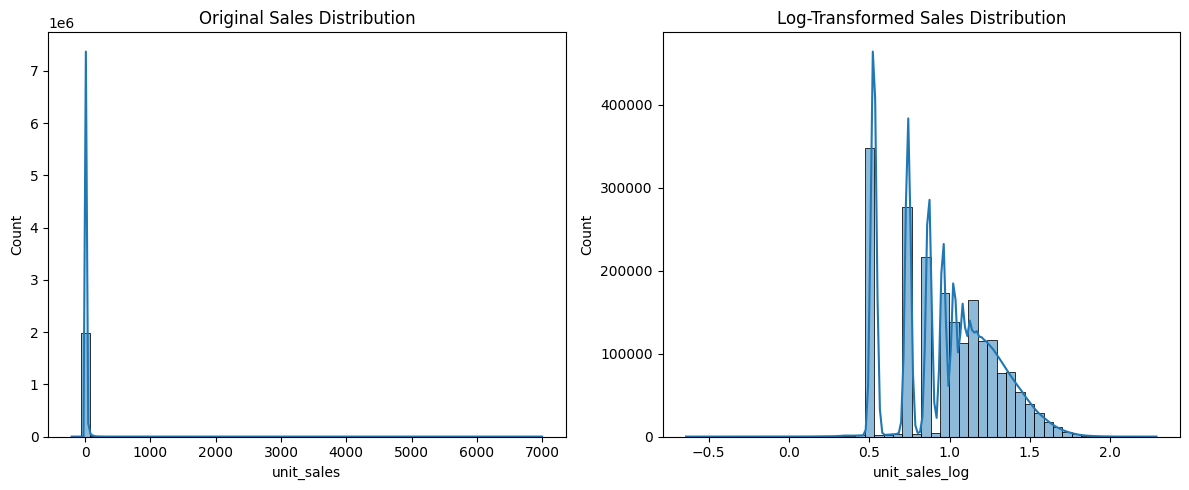

In [156]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(dataset["unit_sales"], bins=50, kde=True)
plt.title("Original Sales Distribution")
# Log-transformed sales distribution
plt.subplot(1,2,2)
# Add +1 to avoid log(0)
sns.histplot(np.log1p(dataset["unit_sales_log"]), bins=50, kde=True)
plt.title("Log-Transformed Sales Distribution")

plt.tight_layout()
plt.show()

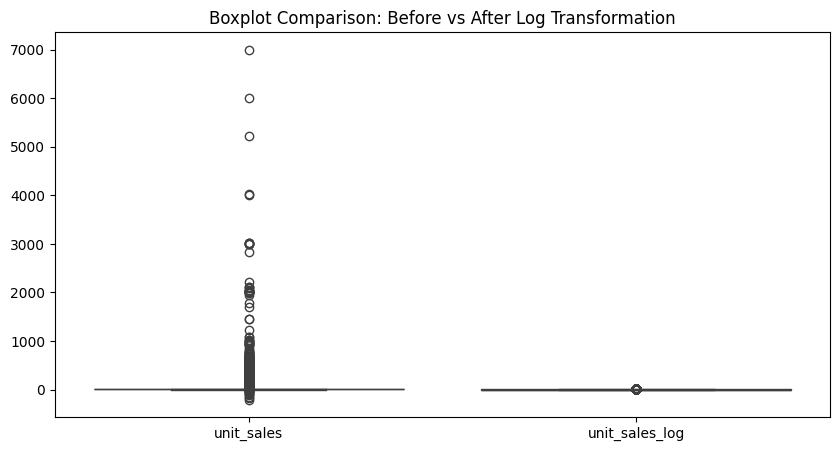

In [157]:
plt.figure(figsize=(10,5))
sns.boxplot(data=[dataset["unit_sales"], dataset["unit_sales_log"]])
plt.xticks([0,1], ["unit_sales", "unit_sales_log"])
plt.title("Boxplot Comparison: Before vs After Log Transformation")
plt.show()

Label Encode Categorical Columns

In [140]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le_family = LabelEncoder()
dataset['family_encoded'] = le_family.fit_transform(dataset['family'])

le_city = LabelEncoder()
dataset['city_encoded'] = le_city.fit_transform(dataset['city'])

le_state = LabelEncoder()
dataset['state_encoded'] = le_state.fit_transform(dataset['state'])

le_type = LabelEncoder()
dataset['type_encoded'] = le_type.fit_transform(dataset['type'])


In [143]:
dataset.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,day,month,dayofweek,family,city,state,type,unit_sales_log,week,family_encoded,city_encoded,state_encoded,type_encoded
0,0,2013-01-01,21,3,7.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B,2.079442,1,12,21,14,1
1,1,2013-01-01,21,4,1.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B,0.693147,1,12,21,14,1
2,2,2013-01-01,21,5,2.0,0,1,1,1,CLEANING,Santo Domingo,Santo Domingo de los Tsachilas,B,1.098612,1,7,21,14,1
3,3,2013-01-01,21,12,1.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B,0.693147,1,12,21,14,1
4,4,2013-01-01,21,15,1.0,0,1,1,1,BREAD/BAKERY,Santo Domingo,Santo Domingo de los Tsachilas,B,0.693147,1,5,21,14,1


Correlation Heatmap of Encoded Categories

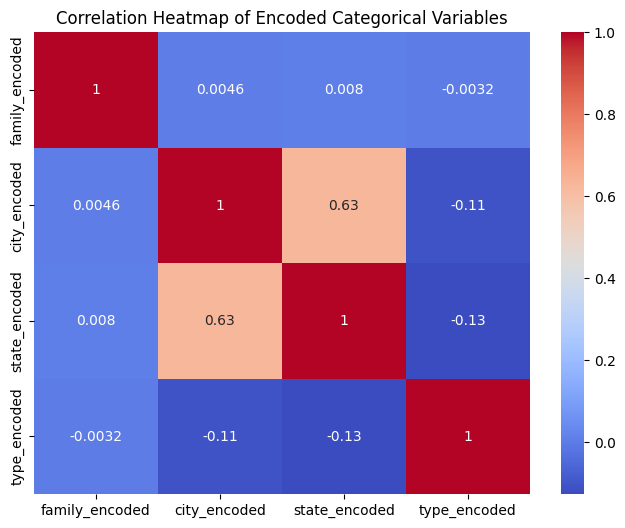

In [141]:
plt.figure(figsize=(8,6))
sns.heatmap(
    dataset[['family_encoded','city_encoded','state_encoded','type_encoded']].corr(),
    annot=True, cmap="coolwarm"
)
plt.title("Correlation Heatmap of Encoded Categorical Variables")
plt.show()


## Feature Engineering Checks: Encoded Categorical Variables

- The correlation heatmap of label-encoded features (`family`, `city`, `state`, `type`) shows that these variables are largely independent, with low linear correlations between them.
- No strong linear relationship exists between store type, product family, city, or state after encoding, which means there is minimal risk of multicollinearity if all are included as features in predictive models.

**Recommendation:**  
- Keep all encoded categorical features for modeling.
- No further action is needed regarding multicollinearity at this stage, but consider more advanced encoding (e.g., target or one-hot encoding) for specific model types.


# `EDA Summary & Recommendations for Preprocessing Team`

## 1. Data Quality Checks
- **Missing Values:** No missing values detected in the dataset.
- **Duplicates:** No duplicate records found.
- **Recommendation:** No imputation or deduplication required at this stage.

## 2. Sales Distribution & Outliers - Univariate Analysis
- **Sales are highly skewed** with many small values and a few very large ones.
- **Log transformation** of `unit_sales` reduces skewness and stabilizes variance, making the data more suitable for modeling.
- **Outliers:** Extreme sales values exist and likely represent real events (e.g., promotions, holidays). Do **not** remove these automatically.
- **Recommendation:** Use log-transformed sales for modeling. Retain outliers, but consider flagging them for potential feature engineering.


## 3. Returns/Refunds Analysis
- **Negative sales (returns/refunds) are present** and are more frequent in certain store types (notably `[D]`) and for promotional items.
- **Recommendation:** Engineer a feature to flag returns/refunds. Consider analyzing returns separately, as they may influence demand forecasting and inventory management.

## 4. Time Series Exploration
- **weekly, and monthly aggregations** reveal different patterns:
    - **Weekly:** Smoother, reveals regular cycles (e.g., weekends).
    - **Monthly:** Highlights seasonality and long-term trends.
    - **7-day rolling average:** Smooths daily data for clearer short-term trends.
- **Recommendation:** Retain all time aggregations for feature engineering. Use rolling averages and extract seasonality features for modeling.

## 5. Promotion Impact
- **Total Sales** Total sales with promotions are higher than without promotions.
- **Promotion impact per item family** not all item families' sales increase with promotions.

## 6. Store & Regional Analysis
- **Sales are concentrated in a few states and store types.**
- **Store type `[D]` has the highest total sales,** but this may be due to more stores or larger stores. Average sales per store type provide a more nuanced view.
- **Recommendation:** Include store type, state, and city as categorical features. Normalize sales by store count/type for fair comparison. Engineer features for store-level performance.

## 7. Lagged Features & Correlations
- **Lagged sales features (7, 14, 30 days)** show positive correlation with current sales, confirming their predictive value for time series models.
- **Recommendation:** Include lagged sales features in modeling. Handle initial NaN values (from lagging) by dropping or imputing as appropriate.

## 8. Categorical Feature Encoding
- **Label encoding** of `family`, `city`, `state`, and `type` shows low correlation between these features, indicating minimal risk of multicollinearity.
- **Recommendation:** Keep all encoded categorical features. For some models, consider more advanced encoding (e.g., one-hot or target encoding).